# AOS AuxTel test data 

Setup:

    ssh -L 54467:localhost:54467 scichris@lsst-devl02
    source "/software/lsstsw/stack/loadLSST.bash"
    setup lsst_distrib
    source /project/scichris/aos/setup_aos_current.sh
    jupyter notebook --no-browser --port=54467

Use simulated batoid data (courtesy J. Meyers), to substitute the numpy arrays below with his data. For WCS, and metadata, use the test data, but alter the values of eg. FOCUSZ (although not too crucial since it's just used to decide which is intra, and which extra-focal). 

Test data is from 
https://github.com/lsst-ts/ts_externalscripts/blob/develop/tests/auxtel/test_latiss_cwfs_align.py#L222
https://github.com/lsst-ts/ts_externalscripts/blob/develop/tests/auxtel/test_latiss_cwfs_align.py#L412 , as used in unit tests: 
    
    2021032300308
    2021032300310
    


## Show the real exposures

In [1]:
from lsst.daf import butler as dafButler
butler = dafButler.Butler('/repo/main/')

registry = butler.registry
datasetRefs = list(registry.queryDatasets(instrument='LATISS', datasetType='raw', collections=['LATISS/raw/all'],
                                          where="exposure.day_obs=20210323"
                                         ))
datasetRefs[0]

DatasetRef(DatasetType('raw', {band, instrument, detector, physical_filter, exposure}, Exposure), {instrument: 'LATISS', detector: 0, exposure: 2021032300001, ...}, id=c17708d6-c627-5431-a836-28cd2cfff8ef, run='LATISS/raw/all')

Check FOCUSZ in this series of exposures:

In [2]:

for exp in range(307,313):
    exposure = butler.get('raw', dataId={'instrument':'LATISS', 'detector':0, 
                                     'exposure':int(f'2021032300{exp}')
                                        },
                      collections=['LATISS/raw/all'])
    print(exp, exposure.getMetadata()['FOCUSZ'])

/lsstdata/offline/instrument/LATISS/storage/2021-03-23/AT_O_20210323_000307-R00S00.fits: outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))


307 -0.847813427448273


/lsstdata/offline/instrument/LATISS/storage/2021-03-23/AT_O_20210323_000308-R00S00.fits: outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))


308 0.752186596393585


/lsstdata/offline/instrument/LATISS/storage/2021-03-23/AT_O_20210323_000309-R00S00.fits: outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))


309 -0.839468240737915


/lsstdata/offline/instrument/LATISS/storage/2021-03-23/AT_O_20210323_000310-R00S00.fits: outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))


310 0.760531783103943


/lsstdata/offline/instrument/LATISS/storage/2021-03-23/AT_O_20210323_000311-R00S00.fits: outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))


311 -0.0349768586456776


/lsstdata/offline/instrument/LATISS/storage/2021-03-23/AT_O_20210323_000312-R00S00.fits: outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))


312 -0.0349768586456776


In [3]:
from lsst.daf import butler as dafButler
butler = dafButler.Butler('/repo/main/', instrument='LATISS')



exposure_intra = butler.get('raw', dataId={'instrument':'LATISS', 'detector':0, 
                                     'exposure':2021032300307},
                      collections=['LATISS/raw/all'])
print(exposure_intra.getMetadata()['FOCUSZ'])


exposure_extra = butler.get('raw', dataId={'instrument':'LATISS', 'detector':0, 
                                     'exposure':2021032300308},
                      collections=['LATISS/raw/all'])

print(exposure_extra.getMetadata()['FOCUSZ'])



/lsstdata/offline/instrument/LATISS/storage/2021-03-23/AT_O_20210323_000307-R00S00.fits: outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))
/lsstdata/offline/instrument/LATISS/storage/2021-03-23/AT_O_20210323_000308-R00S00.fits: outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))


-0.847813427448273
0.752186596393585


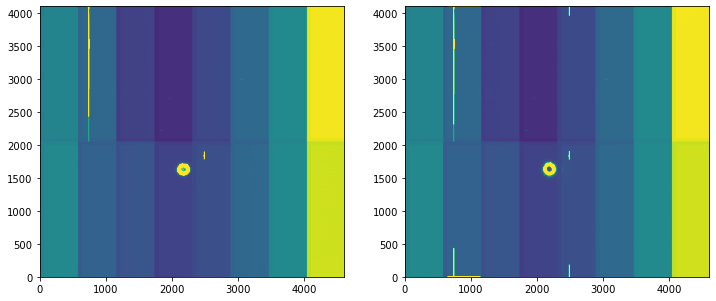

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
fig,ax  = plt.subplots(1,2,figsize=(12, 10))
ax[0].imshow(exposure_extra.image.array, origin='lower',vmax=20000)# vmax=50)
mappable = ax[1].imshow(exposure_intra.image.array, origin='lower',vmax=20000)
#plt.colorbar(mappable,ax=ax[1])

Run the ISR: 

    ssh lsst-devl02

    source "/software/lsstsw/stack/loadLSST.bash"
    setup lsst_distrib

    pipetask run  --data-query "exposure IN (2021032300307,2021032300308,2021032300309,2021032300310,2021032300311) AND instrument='LATISS' " -b /repo/main/butler.yaml --input  LATISS/raw/all,LATISS/calib,u/czw/DM-28920/calib.20210720  --output u/scichris/Latiss/postISRtest --pipeline /project/scichris/aos/testLatiss4.yaml  --register-dataset-types
    
    
  

Show the postISR : 

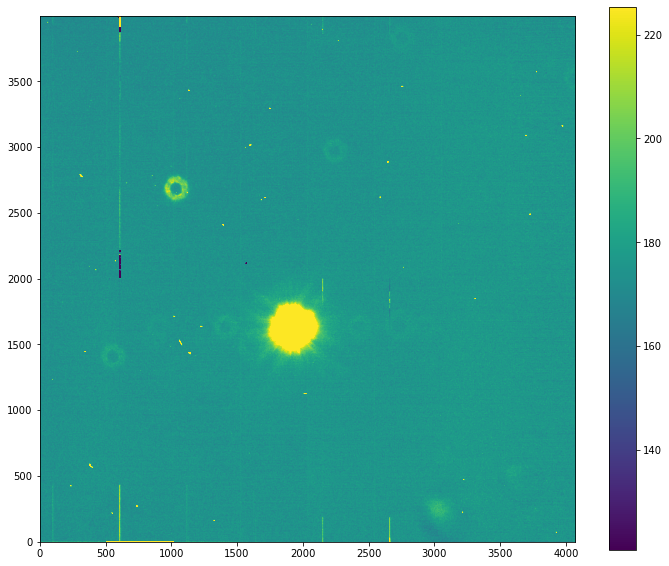

In [3]:
%matplotlib inline
from astropy.io import fits
from astropy.visualization import ZScaleInterval
import matplotlib.pyplot as plt

hdula = fits.open('/repo/main/u/scichris/Latiss/postISRtest/20210930T214817Z/\
postISRCCD/20210323/AT_O_20210323_000307/\
postISRCCD_LATISS_RG610~empty_AT_O_20210323_000307_RXX_S00_u_scichris_Latiss_postISRtest_20210930T214817Z.fits')
fig = plt.figure(figsize=(12, 10))
zscale = ZScaleInterval()
data = hdula[1].data
vmin, vmax = zscale.get_limits(data)
plt.imshow(data, origin='lower',vmin=vmin,vmax=vmax)
plt.colorbar()

## Show the simulated data:

In [1]:
!ls /home/jemeyers/AuxTelSims/M2-rigid/


Explore.ipynb	extra_007.fits	intra_005.fits	sim_003.yaml
extra_000.fits	extra_008.fits	intra_006.fits	sim_004.yaml
extra_001.fits	extra_009.fits	intra_007.fits	sim_005.yaml
extra_002.fits	intra_000.fits	intra_008.fits	sim_006.yaml
extra_003.fits	intra_001.fits	intra_009.fits	sim_007.yaml
extra_004.fits	intra_002.fits	sim_000.yaml	sim_008.yaml
extra_005.fits	intra_003.fits	sim_001.yaml	sim_009.yaml
extra_006.fits	intra_004.fits	sim_002.yaml	sim_at_m2_rigid.py


The `sim_xxx.yaml` files have input settings and true Zernike coefficients (for wavelength of 620 nm).

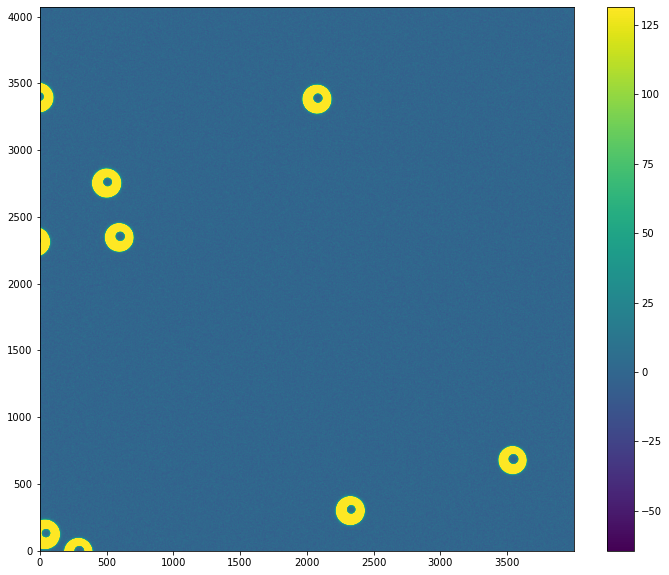

In [5]:
%matplotlib inline
from astropy.io import fits
from astropy.visualization import ZScaleInterval
import matplotlib.pyplot as plt
hdula = fits.open('/home/jemeyers/AuxTelSims/M2-rigid/extra_000.fits')
fig = plt.figure(figsize=(12, 10))
zscale = ZScaleInterval()
data = hdula[0].data
vmin, vmax = zscale.get_limits(data)
plt.imshow(data, origin='lower',vmin=vmin,vmax=vmax)
plt.colorbar()

## Run Zernike estimation

Figure out the dataIds. Use that to be able to read the  postISR exposures with butler:

In [16]:
from lsst.daf import butler as dafButler
instrument = 'LATISS'
dataId0 = dict(instrument=instrument)
repo_dir = '/repo/main/'
butler = dafButler.Butler(repo_dir, collections=['run1'])
                          
dataset = next(iter(
                butler.registry.queryDatasets(
                    datasetType='postISRCCD', 
                    collections=['u/scichris/Latiss/postISRtest'],
                    dataId=dataId0  )
                )
           )

expN = dataset.dataId["exposure"]

# Get the refs  for this dataset
refs = []
for ref in butler.registry.queryDatasets(
                    datasetType='postISRCCD', 
                    collections=['u/scichris/Latiss/postISRtest'],
                    dataId=dataId0  ):
    refs.append(ref)

In [7]:
refs[0].dataId

{instrument: 'LATISS', detector: 0, exposure: 2021032300307, ...}

Show the postISR exposures:

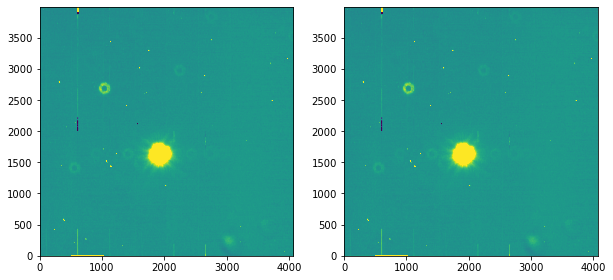

In [19]:
%matplotlib inline
from astropy.io import fits
from astropy.visualization import ZScaleInterval
import matplotlib.pyplot as plt
zscale = ZScaleInterval()
exp1 = butler.get(datasetRefOrType='postISRCCD',dataId=refs[0].dataId,
              collections=['u/scichris/Latiss/postISRtest'])

exp2 = butler.get(datasetRefOrType='postISRCCD',dataId=refs[1].dataId,
              collections=['u/scichris/Latiss/postISRtest'])

%matplotlib inline
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2,figsize=(10,5))
data  = exp1.image.array
vmin, vmax = zscale.get_limits(data)
ax[0].imshow(data, origin='lower', vmin=vmin,vmax=vmax)

data  = exp1.image.array
vmin, vmax = zscale.get_limits(data)
ax[1].imshow(data, origin='lower', vmin=vmin,vmax=vmax)

## Replace the numerical portion of arrays with simulated data:

In [21]:
import numpy as np

hdul1 = fits.open('/home/jemeyers/AuxTelSims/M2-rigid/extra_000.fits')
exp1.image.array[:] = np.transpose(hdul1[0].data)

In [22]:
hdul2 = fits.open('/home/jemeyers/AuxTelSims/M2-rigid/intra_000.fits')
exp2.image.array[:] = np.transpose(hdul2[0].data)

Show that it worked:

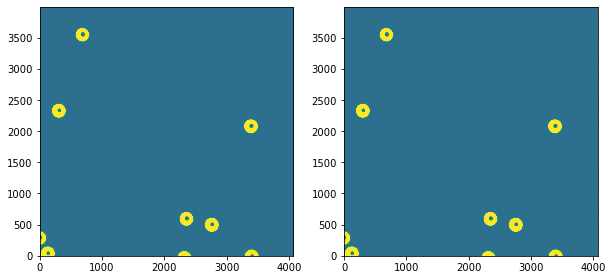

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2,figsize=(10,5))
data  = exp1.image.array
vmin, vmax = zscale.get_limits(data)
ax[0].imshow(data, origin='lower', vmin=vmin,vmax=vmax)

data  = exp1.image.array
vmin, vmax = zscale.get_limits(data)
ax[1].imshow(data, origin='lower', vmin=vmin,vmax=vmax)

Declare the exposure pair using the updated data:

In [45]:
expPair = [exp1, exp2 ]

## Fit the donut template 

In [26]:
from lsst.ts.wep.task.EstimateZernikesLatissTask import EstimateZernikesLatissTask, EstimateZernikesLatissTaskConfig
estimateZernikeConfig = EstimateZernikesLatissTaskConfig(donutStampSize=200,donutTemplateSize=200)
estimateZernikeTask = EstimateZernikesLatissTask(config=estimateZernikeConfig)
estimateZernikeTask.instName = 'auxTel'
estimateZernikeTask.opticalModel = 'onAxis'

Fit the template to extra-focal data:

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
from lsst.ts.wep.Utility import DefocalType

# get the defocal exposure...
from lsst.daf import butler as dafButler
#butler = dafButler.Butler('/repo/main/', collections=['u/scichris/Latiss/postISRtest'])
#exposure  = butler.get(datasetRefOrType='postISRCCD',
#                       dataId={'detector':"RXX_S00",'exposure':2021032300308})


exposure = exp1
# make template 
detectorName = exposure.getDetector().getName()
pixelScale = exposure.getWcs().getPixelScale().asArcseconds()
defocalType = DefocalType.Extra
template = estimateZernikeTask.getTemplate(detectorName, defocalType, pixelScale)

In DonutTemplateModel using opticalModel onAxis
and maskScalingFactorLocal=2.0
apertureDiameter=1.2, focalLength=21.6
offset=0.0475
maskScalingFactorLocal=2.0

 rMask:
0.0026388888888888885


Text(0.5, 1.0, 'auxTel, onAxis, mSf=0.5')

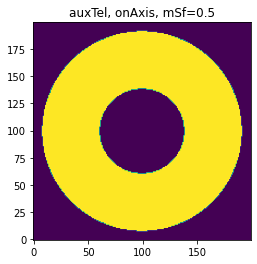

In [28]:
plt.imshow(template,origin='lower')
plt.title(f'auxTel, {estimateZernikeTask.opticalModel}, mSf=0.5')
#plt.savefig(f'auxTel_{estimateZernikeTask.opticalModel}_maskScalingFactorLocal-05.png')

What's the data range in the array? 

(array([5.181860e+06, 2.351537e+06, 4.868310e+05, 5.226300e+04,
        8.357000e+03, 5.300000e+03, 4.389000e+03, 3.791000e+03,
        3.524000e+03, 3.202000e+03]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.],
       dtype=float32),
 <BarContainer object of 10 artists>)

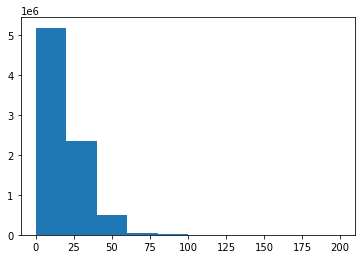

In [35]:
plt.hist(np.ravel(exposure.image.array), range=(0,200))

Detect the donuts. First, check the binary image for the threshold level:

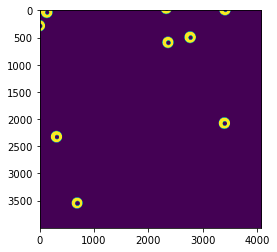

In [36]:
from lsst.ts.wep.Utility import CentroidFindType
from lsst.ts.wep.cwfs.CentroidFindFactory import CentroidFindFactory
from copy import copy


centroidFinder = CentroidFindFactory.createCentroidFind(
    CentroidFindType.ConvolveTemplate
)

expArray = copy(exposure.getImage().getArray())

# this is to make sure that oversaturated pixels do not 
# confuse the image range 

thresh = 200
highThresh = 400
expArray[expArray < thresh] = 0
expArray[expArray >= thresh] = 1
expArray[expArray > highThresh] = 0

binaryExp = centroidFinder.getImgBinary(copy(expArray))
plt.imshow(binaryExp)

In [37]:
from lsst.ts.wep.DonutDetector import DonutDetector
detector = DonutDetector()

from copy import copy
expArray = copy(exposure.getImage().getArray())

# this is to make sure that oversaturated pixels do not 
# confuse the image range 
# thresh = 180
# expArray[expArray < thresh] = 0
# expArray[expArray >= thresh] = 1

thresh = 200
highThresh = 400
expArray[expArray < thresh] = 0
expArray[expArray >= thresh] = 1
expArray[expArray > highThresh] = 0
donutDf = detector.detectDonuts(expArray, template, blendRadius=100,
                               peakThreshold=0.95)

In [38]:
donutDf

,x_center,y_center,blended,blended_with,num_blended_neighbors
0,2331,312,False,None,0
1,506,2763,False,None,0
2,2082,3390,False,None,0
3,600,2356,False,None,0
4,3545,687,False,None,0
5,54,130,False,None,0


Make a donut catalog, which needs a coordinate column, and different names for columns

In [39]:
# need  to rename columns 
# as we EstimateZernikes 
# expects different names 
#Unnamed: 0	coord_ra	coord_dec	centroid_x	centroid_y	source_flux	detector	mags
donutCat = donutDf.copy()

# also, need to transpose y--> x 
donutCat = donutCat.rename(columns={"y_center":"centroid_x", "x_center":"centroid_y"})

donutCat['detector'] = "RXX_S00"



Plot the detected donuts on top of the exposure

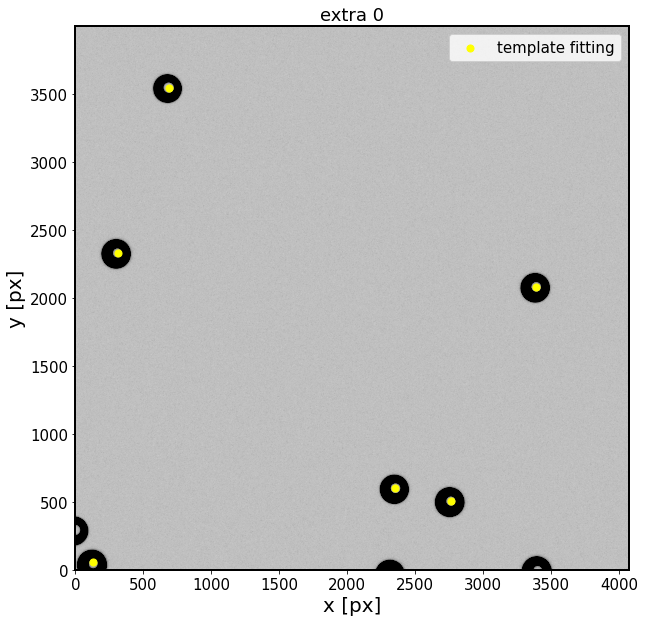

In [42]:
from astropy.visualization import ZScaleInterval
from lsst.daf import butler as dafButler
import lsst.afw.cameraGeom.utils as cameraGeomUtils
import lsst.afw.display as afwDisplay
import matplotlib.pyplot as plt
from matplotlib import rcParams 
from astropy.io import fits
from astropy.visualization import ZScaleInterval

import numpy as np 
import os 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

data = exposure.image.array
zscale = ZScaleInterval()
vmin, vmax = zscale.get_limits(data)

fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(data, vmin=vmin, vmax=vmax,cmap='Greys', origin='lower')
ax.scatter(donutDf['y_center'], donutDf['x_center'], s=50, c='yellow', label='template fitting')


ax.set_title('extra 0')
ax.set_xlabel('x [px]')
ax.set_ylabel('y [px]')
plt.legend()

Try to get any ra,dec in radians, even based on an incorrect WCS, to pass to `cutoutStamps`:

In [43]:
wcs = exposure.getWcs()

import numpy as np 
x = np.array(donutCat['centroid_x'].values)
y = np.array(donutCat['centroid_y'].values)

x = np.zeros(0)
for row in donutCat['centroid_x'] : 
    x = np.append(x, row)
    
ra,dec = wcs.pixelToSkyArray(x,y,degrees=False)  

donutCat['coord_ra'] = ra
donutCat['coord_dec'] = dec

Run the Zernike estimation given the exposure pair and the donut catalog

In [46]:
# This should return the extra-focal DonutStamps, intra-focal DonutStamps and
# Zernike coefficient numpy array as Struct that can be saved to
# Gen 3 repository all with the same dataId.
zernikeOutput = estimateZernikeTask.run(expPair, donutCat, "LATISS")

In DonutTemplateModel using opticalModel onAxis
and maskScalingFactorLocal=2.0
apertureDiameter=1.2, focalLength=21.6
offset=0.0475
maskScalingFactorLocal=2.0

 rMask:
0.0026388888888888885
In DonutTemplateModel using opticalModel onAxis
and maskScalingFactorLocal=2.0
apertureDiameter=1.2, focalLength=21.6
offset=0.0475
maskScalingFactorLocal=2.0

 rMask:
0.0026388888888888885
0 / 6
apertureDiameter=1.2, focalLength=21.6
offset=0.0475
maskScalingFactorLocal=1

 rMask:
0.0013194444444444443
apertureDiameter=1.2, focalLength=21.6
offset=0.0475
maskScalingFactorLocal=1

 rMask:
0.0013194444444444443
imageCoCenter: (x, y) = (  108.92,  110.00)

imageCoCenter: (x, y) = (  100.13,  100.21)

itr = 0, z4-z22
[ 56.  18.  -1. 389. 303.  13. -12.  -3.   3.  -5.   1.   2. -52. -66.
   3.  -3.   0.  -0.  -3.]
itr = 1, z4-z22
[139. 106.   0. 379. 298.  14. -11. -12.   3. -14.   4.   2. -56. -68.
   4.  -4.   0.  -1.  -3.]
itr = 2, z4-z22
[219. 188. -28. 393. 300.  19. -13.  -9.   6. -27.  12.   4. -

itr = 12, z4-z22
[334.  70.   7. 245. 193.  18. -30.  16.   6.  -7.  -9.   8. -15. -22.
   0.   1.  -6.  -3.  -2.]
itr = 13, z4-z22
[326.  60.  12. 247. 192.  15. -30.  15.   5.  -6.  -9.   8. -15. -23.
   1.   1.  -6.  -3.  -2.]
itr = 14, z4-z22
[322.  57.  12. 248. 191.  13. -29.  14.   5.  -6.  -9.   8. -14. -23.
   1.   1.  -6.  -3.  -2.]
4 / 6
apertureDiameter=1.2, focalLength=21.6
offset=0.0475
maskScalingFactorLocal=1

 rMask:
0.0013194444444444443
apertureDiameter=1.2, focalLength=21.6
offset=0.0475
maskScalingFactorLocal=1

 rMask:
0.0013194444444444443
imageCoCenter: (x, y) = (  104.56,  105.79)

imageCoCenter: (x, y) = (  103.32,  104.06)

itr = 0, z4-z22
[ 62.   1.  12. 388. 304.  13.  -6.  -3.   0.  -3.   2.  -1. -52. -68.
   1.  -3.  -1.   1.  -4.]
itr = 1, z4-z22
[ 93.   7.  12. 380. 305.  15.  -5.  -4.   1.  -3.   2.  -1. -53. -65.
   1.  -3.  -1.   0.  -3.]
itr = 2, z4-z22
[133.  -8.  -0. 396. 332.  31. -15.  -3.   2.   2.   7.  -1. -71. -79.
   4.  -6.  -0.  -1.  -4.]

Explore the results

In [47]:
zerCoeff = zernikeOutput.outputZernikesAvg

One set of values per donut

In [49]:
len(zernikeOutput.outputZernikesRaw)

6

19 Zernikes per donut - Zk4:23, ![illustrated here](https://www.researchgate.net/profile/Lei-Wang-5/publication/320866060/figure/fig4/AS:557441190293505@1509915744833/Graphical-illustration-of-top-20-Zernike-terms-as-a-pyramid-Zernike-terms.png)



In [86]:
len(zernikeOutput.outputZernikesRaw[0])

19

In [93]:
zernikeOutput.outputZernikesRaw[0]

array([ 0.26272996,  0.05518067,  0.0096782 ,  0.22898884,  0.17638455,
        0.02840912, -0.00922467,  0.01000575,  0.00371905, -0.00466167,
       -0.00344013,  0.00553976, -0.01114981, -0.01503441,  0.00035839,
       -0.00200893, -0.00084696, -0.0064468 , -0.00109415])

Read-in the simulation values - "truth"

In [6]:
import yaml
fpath ='/home/jemeyers/AuxTelSims/M2-rigid/sim_000.yaml'

with open(fpath) as fh:
    truth = yaml.safe_load(fh)
    
zk = truth['zern']

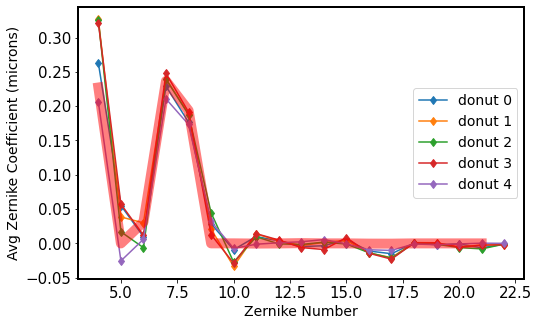

In [102]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(8, 5))
# I'm not sure about the OPD values to compare to... 
#plt.plot(np.arange(4, 23), opdVals[85], '-o', lw=3, markersize=10, label='OPD')
#plt.plot(np.arange(4, 23),  zernikeOutput.outputZernikesAvg, '-x', lw=10,alpha=0.5, markersize=14, label='average')
for i in range(len(zernikeOutput.outputZernikesRaw[:-1])):#[0,1,2,3,4,5,6,7]:
    plt.plot(np.arange(4, 23),zernikeOutput.outputZernikesRaw[i], '-d', label=f'donut {i}')
    plt.xlabel('Zernike Number', size=14)
    plt.ylabel('Avg Zernike Coefficient (microns)', size=14)
plt.plot(np.arange(4, 22), zk[4:], c='red',lw=10,alpha=0.5, markersize=14, )
plt.legend(fontsize=14, loc='center right')

Plot the donut stamps 

Text(0.5, 1.0, 'Intra')

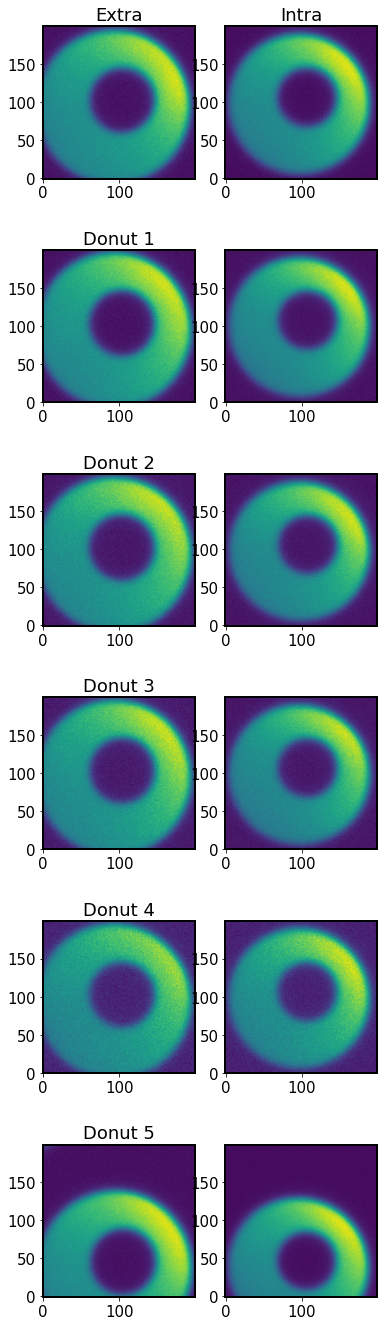

In [55]:
nrows = len(zernikeOutput.donutStampsExtra)
fig,ax = plt.subplots(nrows,2,figsize=(nrows,4*nrows))

for i in range(nrows):
    donut = zernikeOutput.donutStampsExtra[i]
    ax[i,0].imshow(donut.stamp_im.getArrays()[0], origin='lower')
    
    donut = zernikeOutput.donutStampsIntra[i]
    ax[i,1].imshow(donut.stamp_im.getArrays()[0], origin='lower')
    ax[i,0].set_title(f'Donut {i}')
ax[0,0].set_title('Extra')
ax[0,1].set_title('Intra')